# HW-1
### Team Members:
1. Raj Kumar Mannam - 1002126524
2. Manisha Varma Bharatha - 1002034501
3. Balaji Bonagiri - 1002069262

**Import libraries**

In [50]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support
from sklearn.model_selection import cross_val_score


**Load the USPS dataset**

In [51]:
file_path = 'usps.h5'

with h5py.File(file_path, 'r') as hf:
    train = hf.get('train')
    X_train = train.get('data')[:]
    y_train = train.get('target')[:]
    test = hf.get('test')
    X_test = test.get('data')[:]
    y_test = test.get('target')[:]


**Visualize some training images
We will visualize the first 10 training images in the dataset. We can adjust num_images and figsize as needed.**

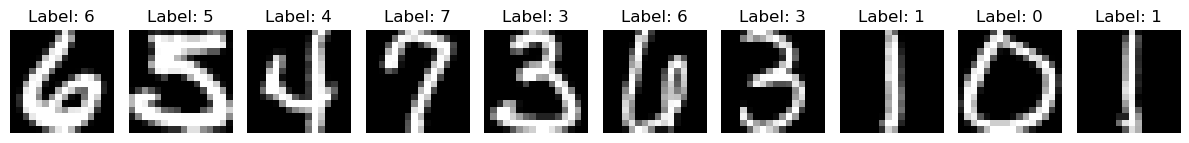

In [52]:
# Parameters for visualization
num_images = 10
figsize = (12, 4)

# Create a new figure with the specified size
fig, axes = plt.subplots(1, num_images, figsize=figsize)

# Loop through the desired number of images to display them
for idx in range(num_images):
    ax = axes[idx]
    ax.imshow(X_train[idx].reshape(16, 16), cmap='gray')
    ax.axis('off')  # Hide the axis
    ax.set_title(f"Label: {y_train[idx]}")

# Adjust the layout for better visualization
plt.tight_layout()
plt.show()

**Data Preprocessing**

In [53]:
X_train = X_train.reshape(X_train.shape[0], 16 * 16).astype('float32') / 255.0
X_test = X_test.reshape(X_test.shape[0], 16 * 16).astype('float32') / 255.0
print(X_train.shape )
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(7291, 256)
(7291,)
(2007, 256)
(2007,)


**A loop to evaluate KNN for k values from 3 to 5.This will perform cross-validation, training, and evaluation for k values from 3 to 5 and will print out all the related metrics for each 
k.**

In [54]:
k_values = [3, 4, 5]

for k in k_values:
    
    # Cross-validation
    scores = cross_val_score(KNeighborsClassifier(n_neighbors=k), X_train, y_train, cv=5, scoring='accuracy')
    mean_accuracy = scores.mean()
    
    # Train and evaluate KNN
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train, y_train)
    y_pred = knn_classifier.predict(X_test)
    
    # Compute metrics
    test_accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    precision, recall, _, _ = precision_recall_fscore_support(y_test, y_pred, average='macro')
    
    # Print the results
    print(f"\nEvaluating model with K = {k} neighbors:")
    print("Accuracy for each fold:", scores)
    print("Average accuracy across folds:", mean_accuracy)
    print("\nTest Accuracy:", test_accuracy)
    print("\nConfusion Matrix:\n", conf_matrix)
    print("\nPrecision:", precision)
    print("Recall:", recall)
    print('-' * 50)



Evaluating model with K = 3 neighbors:
Accuracy for each fold: [0.96984236 0.95816187 0.96433471 0.95473251 0.96844993]
Average accuracy across folds: 0.963104274024996

Test Accuracy: 0.9446935724962631

Confusion Matrix:
 [[355   0   3   0   0   0   0   0   0   1]
 [  0 258   0   0   3   0   2   1   0   0]
 [  8   0 183   1   1   0   0   2   3   0]
 [  3   0   2 153   0   6   0   1   0   1]
 [  0   2   0   0 183   2   2   2   1   8]
 [  5   0   3   3   0 144   0   0   1   4]
 [  3   1   1   0   2   0 163   0   0   0]
 [  0   1   1   1   4   0   0 138   1   1]
 [  4   0   3   4   0   1   0   1 151   2]
 [  2   0   0   0   3   0   0   4   0 168]]

Precision: 0.9444025152985926
Recall: 0.938344997342736
--------------------------------------------------

Evaluating model with K = 4 neighbors:
Accuracy for each fold: [0.96778615 0.95679012 0.96570645 0.95336077 0.96364883]
Average accuracy across folds: 0.9614584655480247

Test Accuracy: 0.9431988041853513

Confusion Matrix:
 [[355   0 